In [1]:
from cm_fun import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_image_as_grayscale_matrix(image_path):
    """
    Loads an image from the specified path, converts it to grayscale, 
    and returns it as a 2D NumPy array.
    
    :param image_path: Path to the image file (JPG, PNG, etc.)
    :return: 2D NumPy array representing the grayscale image
    """
    # Open the image file
    image = Image.open(image_path)
    
    # Convert the image to grayscale
    grayscale_image = image.convert('L')  # 'L' mode is for grayscale
    
    # Convert the grayscale image to a NumPy array
    grayscale_matrix = np.array(grayscale_image)
    
    return grayscale_matrix

In [3]:
def save_matrix_as_jpg(matrix, output_path):
    """
    Saves a NumPy matrix (grayscale or color) as a JPG image.
    
    :param matrix: The 2D or 3D NumPy array representing the image.
    :param output_path: Path where the JPG image will be saved.
    """
    # Convert the NumPy array back to a Pillow Image
    if len(matrix.shape) == 2:  # Grayscale image (2D array)
        image = Image.fromarray(matrix)
    elif len(matrix.shape) == 3 and matrix.shape[2] == 3:  # RGB image (3D array)
        image = Image.fromarray(matrix, 'RGB')
    else:
        raise ValueError("Unsupported matrix shape. Must be 2D or 3D with 3 channels.")
    
    # Save the image as a JPG file
    image.save(output_path, 'JPEG')
    print(f"Image saved as {output_path}")

In [4]:
img_matrix = load_image_as_grayscale_matrix('./data/img/0.jpg').astype('float64')
img_matrix

array([[138., 139., 141., ..., 153., 151., 150.],
       [137., 139., 140., ..., 148., 146., 146.],
       [137., 138., 139., ..., 145., 143., 143.],
       ...,
       [ 35.,  37.,  39., ...,  22.,  22.,  21.],
       [ 36.,  37.,  39., ...,  23.,  22.,  21.],
       [ 36.,  37.,  39., ...,  23.,  22.,  21.]], shape=(735, 735))

In [5]:
for i in [1,2,3,5,10,20,35,50,100]:
    start(img_matrix, i, f'img_{i}k')

it.0 | 0.005505800247192383 | obj=51070.057093065814 | U_norm=3198.224164127742 | V_norm=15.557068015538949 |
it.0 | 0.004999876022338867 | obj=31623.490344255424 | U_norm=3198.224164127742 | V_norm=19.98095022715512 |
it.1 | 0.006001949310302734 | obj=31247.406798525557 | U_norm=3207.469773277658 | V_norm=19.98095022715512 |
it.1 | 0.006024599075317383 | obj=31220.912870537028 | U_norm=3207.469773277658 | V_norm=19.98497546135899 |
it.2 | 0.004514217376708984 | obj=31218.1461840239 | U_norm=3207.537196876731 | V_norm=19.98497546135899 |
it.2 | 0.006671905517578125 | obj=31217.83223458944 | U_norm=3207.537196876731 | V_norm=19.985023128279014 |
it.3 | 0.004412412643432617 | obj=31217.796074585352 | U_norm=3207.5380780268206 | V_norm=19.985023128279014 |
it.3 | 0.006515026092529297 | obj=31217.791898163505 | U_norm=3207.5380780268206 | V_norm=19.985023762379754 |
it.4 | 0.006001472473144531 | obj=31217.79141552713 | U_norm=3207.5380897877367 | V_norm=19.985023762379754 |
it.4 | 0.006001

In [6]:
def show_grayscale_images(matrices, cols=3):
    """
    Displays multiple NumPy matrices as grayscale images in a grid format.
    
    :param matrices: List of NumPy matrices to display as images.
    :param cols: Number of columns in the grid (default is 3).
    """
    # Calculate the number of rows needed based on the number of images
    rows = (len(matrices) + cols - 1) // cols  # This ensures we have enough rows
    
    # Create a figure with the specified number of rows and columns
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    
    # Flatten axes array for easy indexing, in case of multiple rows
    axes = axes.flatten()
    
    # Display each matrix as a grayscale image
    for i, matrix in enumerate(matrices):
        axes[i].imshow(matrix, cmap='gray', vmin=0, vmax=255)
        axes[i].axis('off')  # Hide axes for better visualization
        axes[i].set_title(f"Image {i + 1}")
    
    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

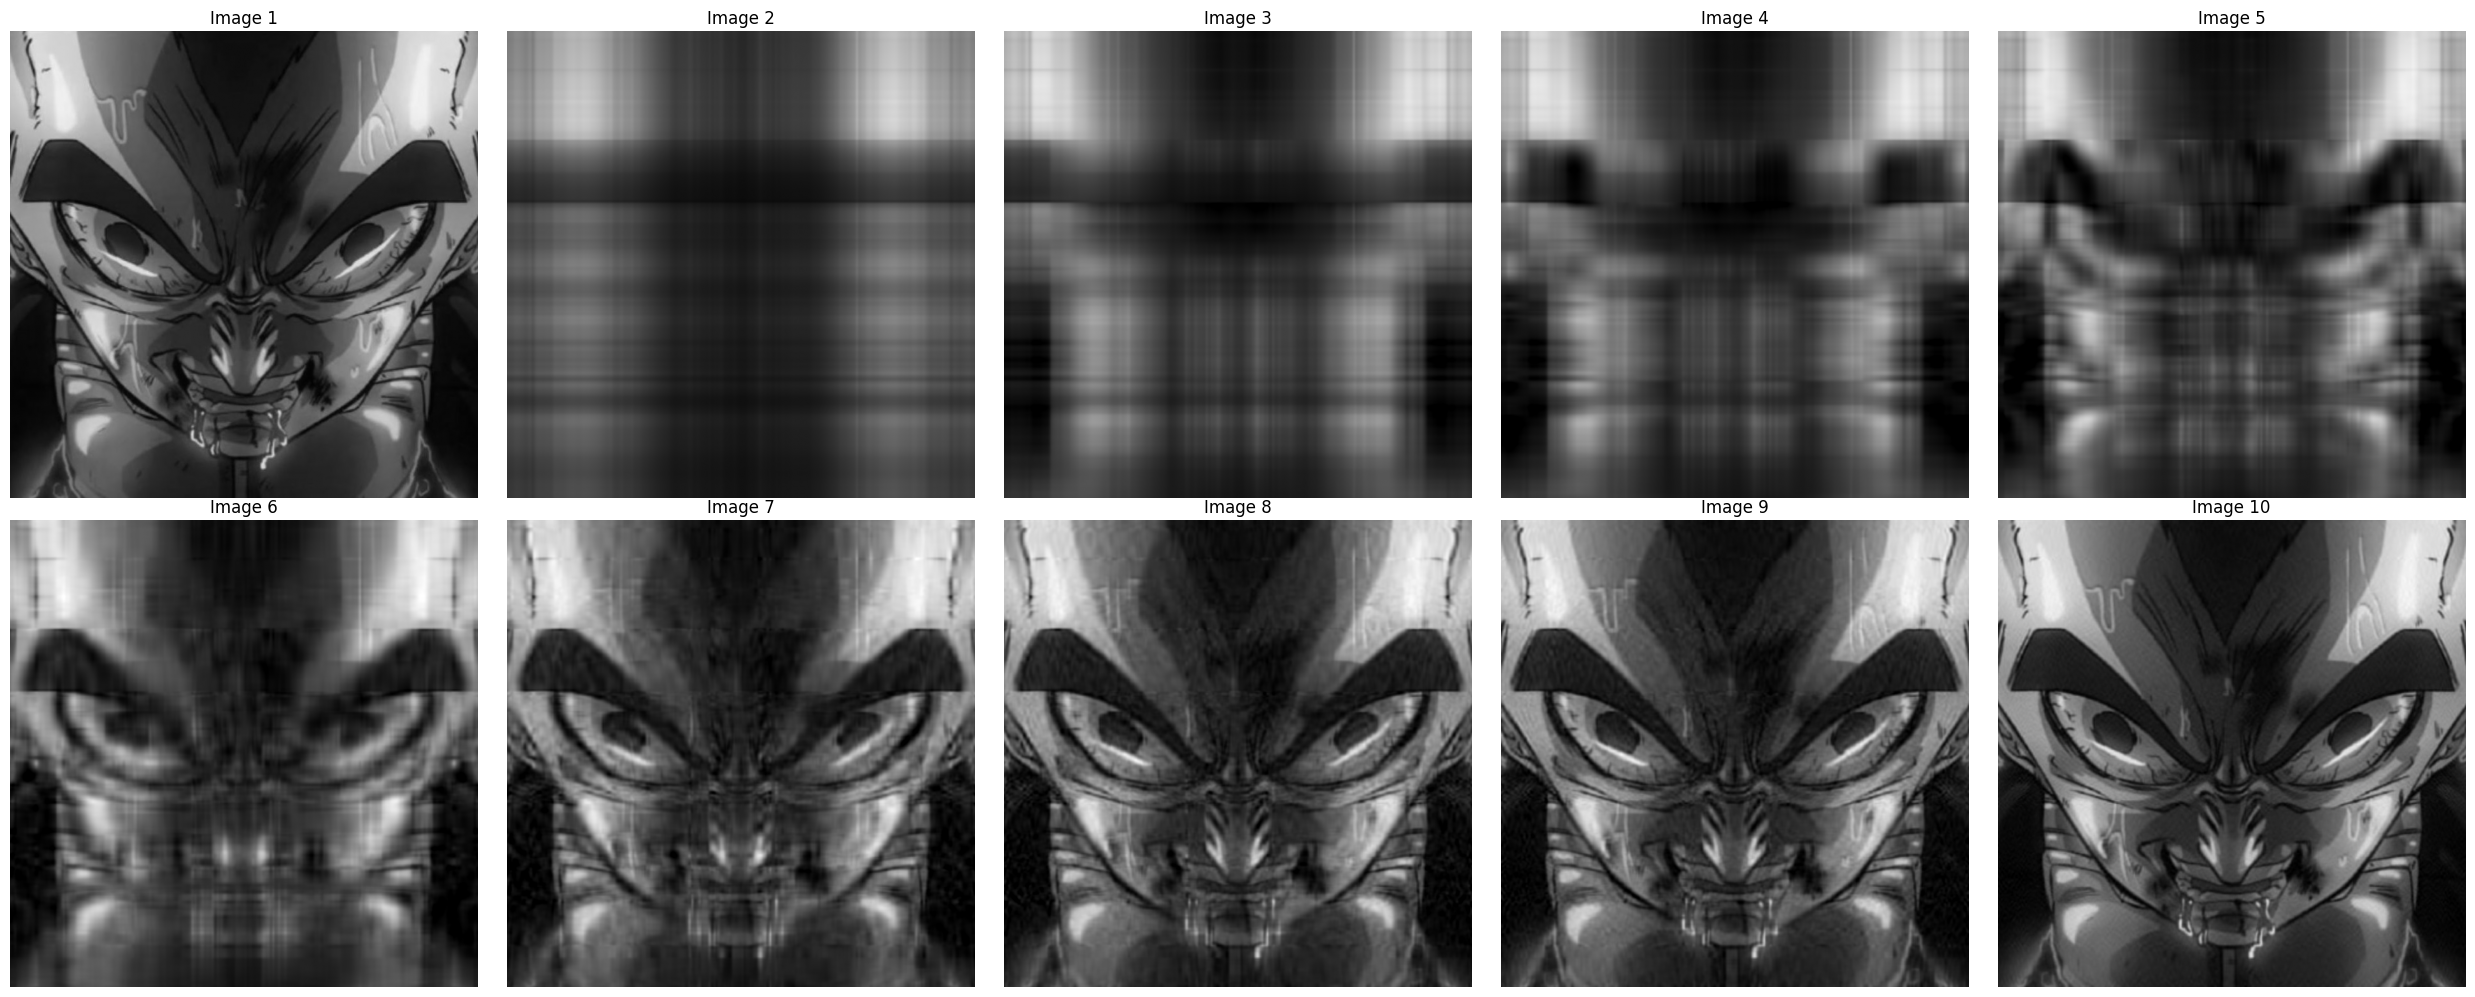

In [7]:
listona = [img_matrix]
for x in [1,2,3,5,10,20,35,50,100]:
    U = np.load(f'./data/test/img_{x}k/U.npy')
    V = np.load(f'./data/test/img_{x}k/V.npy')
    listona.append(np.dot(U, np.transpose(V)))
    
    
show_grayscale_images(listona, 5)